## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [1]:
import numpy as np
import cv2
import os
import glob
import matplotlib.pyplot as plt
import pickle
%matplotlib qt
nx=9
ny=6
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny),None)
    
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        cv2.imshow('img',img)
        cv2.waitKey(500)
    
cv2.destroyAllWindows()

## Distorsion correction applied on test_images

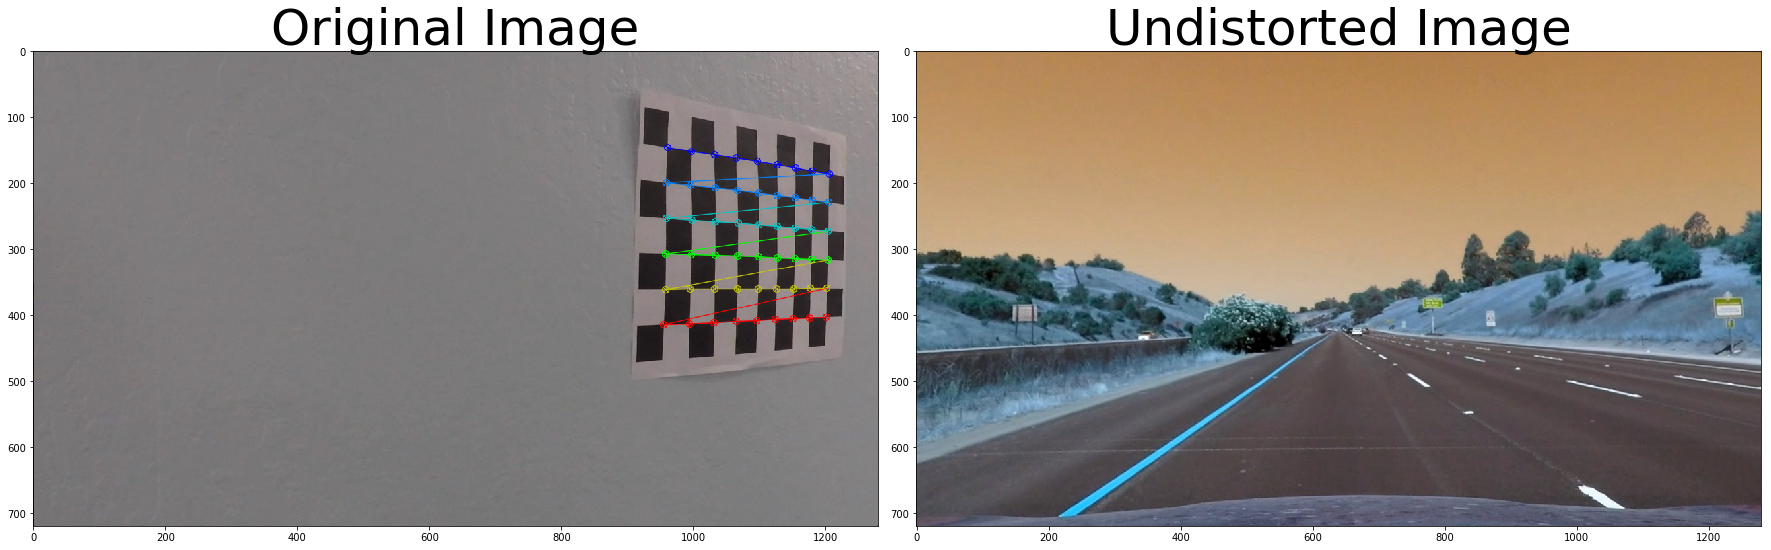

In [2]:
dist_img = cv2.imread('test_images/straight_lines1.jpg')
gray_dist = cv2.cvtColor(dist_img,cv2.COLOR_BGR2GRAY)
img_size = (dist_img.shape[1], dist_img.shape[0])

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
undist = cv2.undistort(dist_img, mtx, dist, None, mtx) 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
ax1.imshow(dist_img)
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undist)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

cm_dict = {'mtx': mtx, 'dist': dist}
with open('camera_matrix.p', 'wb') as f:
    pickle.dump(cm_dict, f)

images = os.listdir("test_images/")
for fname in images:
    img = cv2.imread(os.path.join('test_images/', fname))
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    cv2.imwrite(os.path.join('output_images/', fname), undist );
  